# IBM Applied data science capstone - Final assignment

## Part 1

1. Start by creating a new Notebook for this assignment.

2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe.

3. To create the above dataframe: The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned. More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table. If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making. In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

4. Submit a link to your Notebook on your Github repository. (10 marks)
Note: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

The package is so popular that there is a plethora of tutorials and examples on how to use it. Here is a very good Youtube video on how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

---------------------------------------------

Initial setup of libraries.

In [ ]:
import pandas as pd 
import wikipedia as wp
from bs4 import BeautifulSoup

Download dataset from Wikipedia.

In [51]:
df=pd.read_html("https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=942851379", header = 0)[0]

Only process the cells with an assigned borough and ignore cells otherwise.

In [54]:
df = df[df.Borough != 'Not assigned']

More than one neighborhood can exist in one postal code area e.g., M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma.

In [55]:
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

If a cell has a borough but a not assigned neighborhood, then the neighborhood will be the same as the borough.

In [56]:
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

In [57]:
df

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


Apply the "shape" method to print the number of rows of your dataframe.

In [46]:
df.shape

(103, 3)

## Part 2

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. 

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the dataframe. 
Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

--------------------------------------------------------------------

Initial setup of libraries.

In [59]:
import requests
import io

Get the latitude and the longitude coordinates of each neighborhood, in use to utilize the Foursquare location data.

In [60]:
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

Rename the first column to then merge dataframes on Postcode.

In [61]:
c.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postcode')

Reorder column names; display the final dataframe.

In [62]:
df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]
df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Part 3

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:

to add enough Markdown cells to explain what you decided to do and to report any observations you make.
to generate maps to visualize your neighborhoods and how they cluster together.
Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)

------------------------------------------------------------------------------------------------

Initial setup of libraries.

In [65]:
%matplotlib inline

! pip install shapely
! pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

     |████████████████████████████████| 931kB 9.8MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 23.7MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 22.0MB/s eta 0:00:01


Load latitude and longitude into a "geopandas" dataframe.

In [88]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
gdf

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Coordinates
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,POINT (-79.19435 43.80669)
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,POINT (-79.16050 43.78454)
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,POINT (-79.18871 43.76357)
3,M1G,Scarborough,Woburn,43.770992,-79.216917,POINT (-79.21692 43.77099)
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,POINT (-79.23948 43.77314)
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,POINT (-79.23948 43.74473)
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,POINT (-79.26203 43.72793)
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,POINT (-79.28458 43.71111)
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,POINT (-79.23948 43.71632)
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,POINT (-79.26485 43.69266)


Map.

/opt/conda/envs/Python36/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


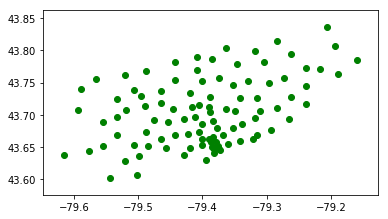

In [87]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')
gdf.plot(ax=ax, color='green')
plt.show()